#  Logistic Regression


In [612]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

In [613]:
X,y = make_blobs(100,centers=5,random_state = 0)

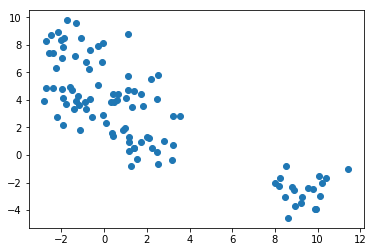

In [614]:
plt.scatter(X[:,0],X[:,1])

In [615]:
model = LogisticRegression()

In [616]:
model.fit(X,y)

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [617]:
inter = model.intercept_
coef = model.coef_

In [618]:
inter

array([-1.66232873,  1.29741388,  1.0510758 , -3.84241725, -1.98126349])

In [619]:
coef

array([[-1.71719261e-04,  1.15570799e-01],
       [-5.82104975e-01, -8.83435302e-01],
       [-1.72670170e+00, -7.76815300e-01],
       [-3.49050535e-01,  5.72090995e-01],
       [ 3.00770248e-01, -1.28094888e+00]])

In [620]:
colors = ["red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange","red","blue","yellow","green","orange"]*10
y_color = list(map(lambda c:colors[c],y))

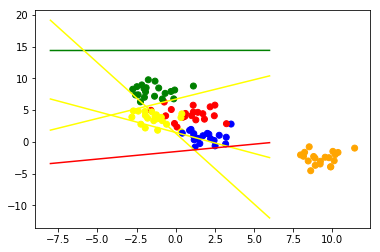

In [621]:
plt.scatter(X[:,0],X[:,1],c=y_color)
i = 0
for c_coef, c_inter in zip(model.coef_, model.intercept_) :
    intercept  = -c_inter/c_coef[1]
    slope = -c_coef[0]/c_coef[1]
    x1 = np.linspace(-8,6,2)
    x2 = x1*slope + intercept
    plt.plot(x1,x2,y_color[i])
    i+=1

In [622]:
model.predict(X[:20])

array([3, 2, 2, 2, 0, 3, 0, 2, 4, 0, 3, 0, 2, 4, 1, 0, 1, 2, 3, 4])

In [623]:
y[:20]

array([3, 2, 2, 2, 0, 3, 0, 0, 4, 1, 0, 0, 2, 4, 1, 0, 0, 2, 3, 4])

In [624]:
model.score(X,y)

0.89

#  Custom Logistic Regression

In [625]:
class CustomLogisticRegression:
    
    def __init__(self, lr = 0.1, iters = 100):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        self.X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.y = y.reshape(-1, 1)
        
        self.theta = np.zeros([self.X.shape[1], 1])
        
        for i in range(self.iters):
            self.gradient_asc()
            
    def gradient_asc(self):
        d_theta = self.gradient()
        self.theta += d_theta * self.lr 
        
    def gradient(self):
        yh = CustomLogisticRegression.hypothesis(self.X, self.theta)
        d_theta = np.mean((self.y - yh)*self.X, axis=0).reshape(-1, 1)
#         print(d_theta)
        return d_theta
    @classmethod
    def hypothesis(cls, X, theta):
        z = np.dot(X, theta)
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return np.round((CustomLogisticRegression.hypothesis(X, self.theta))).astype("int")
    
    def score(self, X, y) :
        yh = self.predict(X)
        y = y.reshape(-1, 1)
        return sum(y == yh) / len(y)

In [626]:
m1 = CustomLogisticRegression(lr = 0.01,iters = 10000)

In [627]:
m1.fit(X,y)

In [628]:
m1.predict(X[:20])
# m1.score(X,y)

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [629]:
y[:20]

array([3, 2, 2, 2, 0, 3, 0, 0, 4, 1, 0, 0, 2, 4, 1, 0, 0, 2, 3, 4])

In [630]:
slope = -m1.theta[1]/m1.theta[2]
intercept = -m1.theta[0]/m1.theta[2]

x1 = np.linspace(-8,6,2)
x2 = x1 * slope + intercept

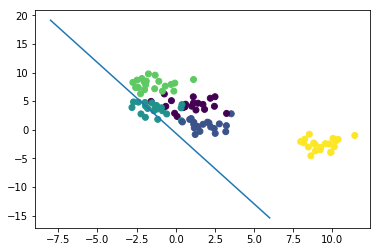

In [631]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.plot(x1,x2)

In [598]:
m1.score(X,y)

array([0.92])

In [600]:
! pip install beautifulsoup4

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [601]:
! python -m pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/5c/e0/be401c003291b56efc55aeba6a80ab790d3d4cece2778288d65323009420/pip-19.1.1-py2.py3-none-any.whl
  Found existing installation: pip 19.0.3
    Uninstalling pip-19.0.3:


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\program files\\python36\\lib\\site-packages\\pip-19.0.3.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#  Scraping

In [605]:
import requests
from bs4 import BeautifulSoup

## Scrap goodreads quotes based on emotion for 3 pages for all the emotions